In [111]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [112]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression


In [113]:
# Download 5 year historical data for AAPL and SPY
df = yf.download(['AAPL','SPY'], start='2020-06-01', end = '2025-06-01', auto_adjust=False)


[*********************100%***********************]  2 of 2 completed


In [114]:
df.head()

Price       Adj Close                  Close                   High  \
Ticker           AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2020-06-01  78.215118  283.256622  80.462502  305.549988  80.587502   
2020-06-02  78.577202  285.601990  80.834999  308.079987  80.860001   
2020-06-03  79.009789  289.402985  81.279999  312.179993  81.550003   
2020-06-04  78.329338  288.642670  80.580002  311.359985  81.404999   
2020-06-05  80.560226  296.040466  82.875000  319.339996  82.937500   

Price                         Low                   Open              \
Ticker             SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2020-06-01  306.209991  79.302498  303.059998  79.437500  303.619995   
2020-06-02  308.130005  79.732498  305.100006  80.187500  306.549988   
2020-06-03  313.220001  80.574997  309.940002  81.165001  310.239990   
2020-06-04  313.000000  80.195000  309.079987  81.097504  311.109985   
2020-06-05  321.269989  80.807503  317.160004  80.837502  317.230011   

Price          Volume             
Ticker           AAPL        SPY  
Date                              
2020-06-01   80791200   55758300  
2020-06-02   87642800   74267200  
2020-06-03  104491200   92567600  
2020-06-04   87560400   75794400  
2020-06-05  137250400  150524700

In [115]:
# We are using adjusted close prices since they account for dividends and stock splits
adj_close = df[['Adj Close']].copy().reset_index()
adj_close.columns = ['Date', 'AAPL', 'SPY']
# Now we will convert the 'Date' column to datetime and set it as the index
adj_close['Date'] = pd.to_datetime(adj_close['Date'])
adj_close.set_index('Date', inplace=True)

In [116]:
# Checking for null values
adj_close.isnull().sum()

AAPL    0
SPY     0
dtype: int64

In [117]:
# Calculating daily returns for AAPL and SPY
adj_close['AAPL returns'] = adj_close['AAPL'].pct_change(1)
adj_close['SPY returns'] = adj_close['SPY'].pct_change(1)
adj_close.head()

,AAPL,SPY,AAPL returns,SPY returns
Date,,,,
2020-06-01,78.215118,283.256622,NaN,NaN
2020-06-02,78.577202,285.601990,0.004629,0.008280
2020-06-03,79.009789,289.402985,0.005505,0.013309
2020-06-04,78.329338,288.642670,-0.008612,-0.002627
2020-06-05,80.560226,296.040466,0.028481,0.025630


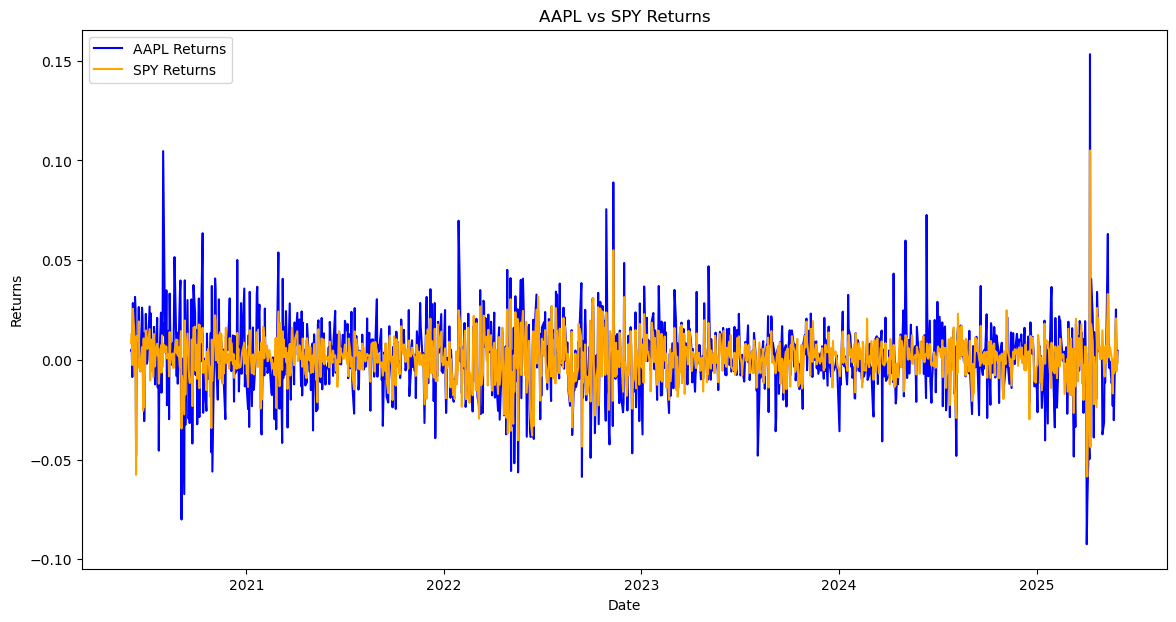

In [118]:
# Nowe we plot the returns of AAPL and SPY
plt.figure(figsize=(14, 7))
plt.plot(adj_close['AAPL returns'], label='AAPL Returns', color='blue')
plt.plot(adj_close['SPY returns'], label='SPY Returns', color='orange')
plt.title('AAPL vs SPY Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [119]:
# Calculating log returns for AAPL and SPY
# Log returns are often used in financial analysis as they are time additive
adj_close['AAPL_log_returns'] = np.log(adj_close['AAPL returns']+1)
adj_close['SPY_log_returns'] = np.log(adj_close['SPY returns']+1)
adj_close.head()

,AAPL,SPY,AAPL returns,SPY returns,AAPL_log_returns,SPY_log_returns
Date,,,,,,
2020-06-01,78.215118,283.256622,NaN,NaN,NaN,NaN
2020-06-02,78.577202,285.601990,0.004629,0.008280,0.004619,0.008246
2020-06-03,79.009789,289.402985,0.005505,0.013309,0.005490,0.013221
2020-06-04,78.329338,288.642670,-0.008612,-0.002627,-0.008650,-0.002631
2020-06-05,80.560226,296.040466,0.028481,0.025630,0.028083,0.025307


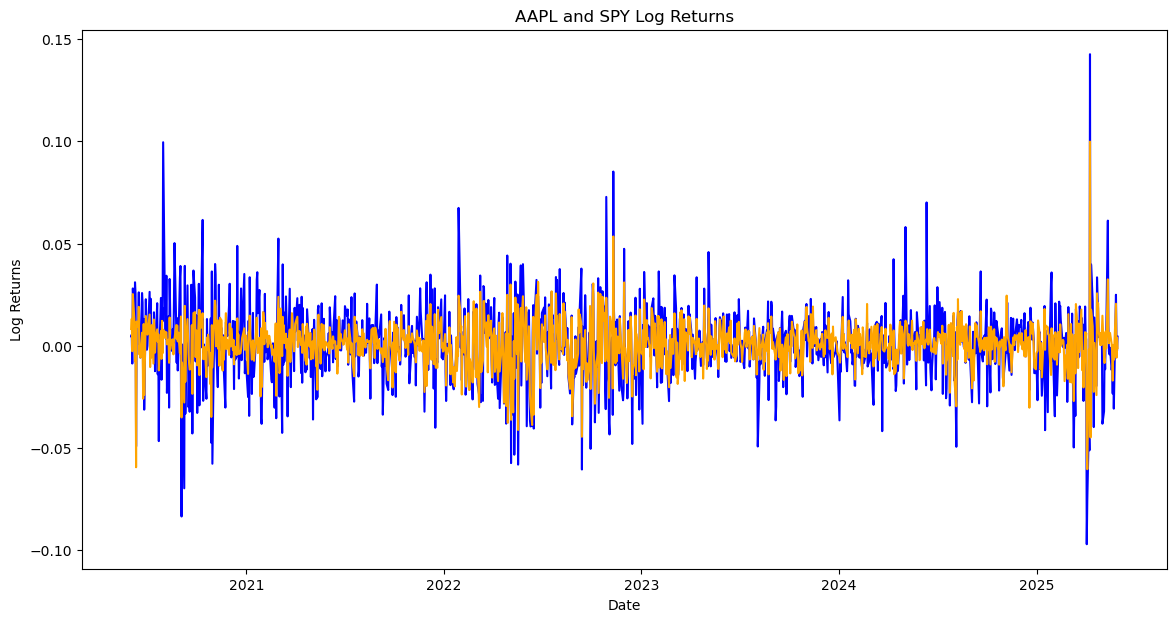

In [120]:
# Now we plot the log returns of AAPL and SPY 
plt.figure(figsize=(14, 7))
plt.plot(adj_close['AAPL_log_returns'], label='AAPL Log Returns', color='blue')
plt.plot(adj_close['SPY_log_returns'], label='SPY Log Returns', color='orange')
plt.title('AAPL and SPY Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Returns')

plt.show()

In [121]:
# compute the mean and standard deviation of the returns for each ticker
# This will help us understand the average return and volatility of each stock
aapl_mean, spy_mean, aapl_std,spy_std = adj_close['AAPL returns'].mean(), adj_close['SPY returns'].mean(), adj_close['AAPL returns'].std(), adj_close['SPY returns'].std()

print(f"AAPL Mean: {aapl_mean}, AAPL Std Dev: {aapl_std}")
print(f"SPY Mean: {spy_mean}, SPY Std Dev: {spy_std}")

AAPL Mean: 0.0009294904038159806, AAPL Std Dev: 0.018933725796490046
SPY Mean: 0.0006446751720590633, SPY Std Dev: 0.011275712001912424


In [122]:
# we compute the log return mean and standard deviation for each ticker
aapl_log_mean, spy_log_mean, aapl_log_std, spy_log_std = adj_close['AAPL_log_returns'].mean(), adj_close['SPY_log_returns'].mean(), adj_close['AAPL_log_returns'].std(), adj_close['SPY_log_returns'].std()
print(f"AAPL Log Mean: {aapl_log_mean}, AAPL Log Std Dev: {aapl_log_std}")
print(f"SPY Log Mean: {spy_log_mean}, SPY Log Std Dev: {spy_log_std}")

AAPL Log Mean: 0.0007508721594746171, AAPL Log Std Dev: 0.0188736036522208
SPY Log Mean: 0.000581037395356019, SPY Log Std Dev: 0.011268390600106887


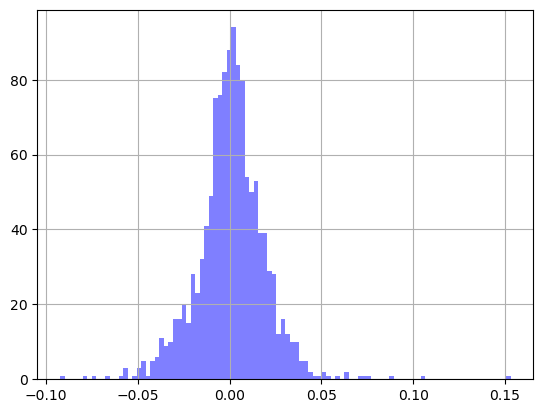

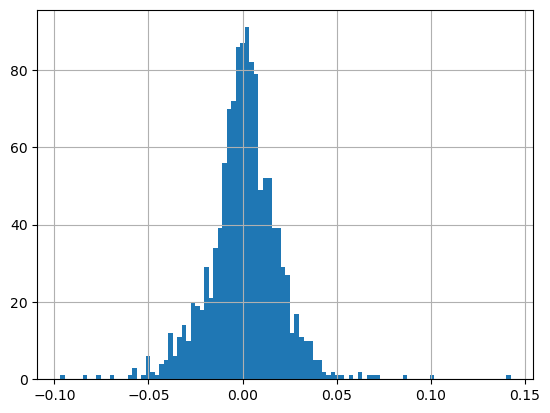

In [123]:
# Now we will plot the histogram of AAPL returns
adj_close['AAPL returns'].hist(bins=100, alpha=0.5, label='AAPL Returns', color='blue')
plt.show()
# We plot the histogram of AAPL log returns
adj_close['AAPL_log_returns'].hist(bins=100)
plt.show()


In [124]:
# Now we will calculate the skewness and kurtosis of AAPL returns
# Skewness measures the asymmetry of the distribution, while kurtosis measures the tail shape of the distribution.
apple_skew = adj_close['AAPL returns'].skew()
apple_kurt = adj_close['AAPL returns'].kurtosis()
print(f"AAPL Skewness: {aaple_skew}, AAPL Kurtosis: {apple_kurt}")

AAPL Skewness: 0.3745520026319142, AAPL Kurtosis: 5.595115089939194


### Given that the skewness of apple returns is positive, we can conclude that the distribution of AAPL returns is right-skewed, meaning that there are more extreme positive returns. Additionally, the kurtosis is much greater than zero which indicates that the distribution has heavier tails than a normal distribution, which suggests extreme return values are more likely than in a normal distribution.


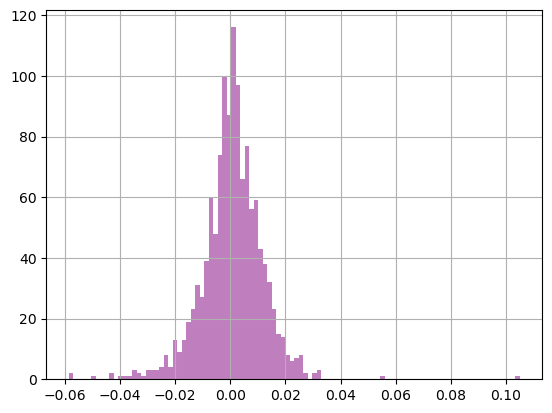

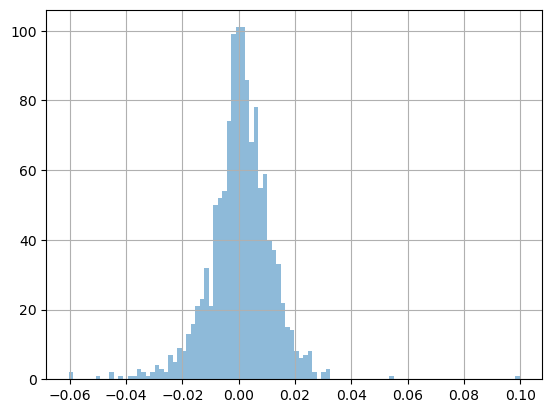

In [125]:
# Now we plot the histogram of SPY returns
adj_close['SPY returns'].hist(bins=100, alpha=0.5, label='SPY Returns', color='purple')
plt.show()
# log returns histogram for SPY
adj_close['SPY_log_returns'].hist(bins=100, alpha=0.5)
plt.show()

In [126]:
# Let's calculate the skewness and kurtosis of SPY returns
spy_skew = adj_close['SPY returns'].skew()
spy_kurt = adj_close['SPY returns'].kurtosis()
print(f"SPY Skewness: {spy_skew}, SPY Kurtosis: {spy_kurt}")

SPY Skewness: 0.10714168367116847, SPY Kurtosis: 7.989110121571395


### Since SPY also has similar findings we can conclude the same as above. We may have to use another distribution than the Gaussian distribution

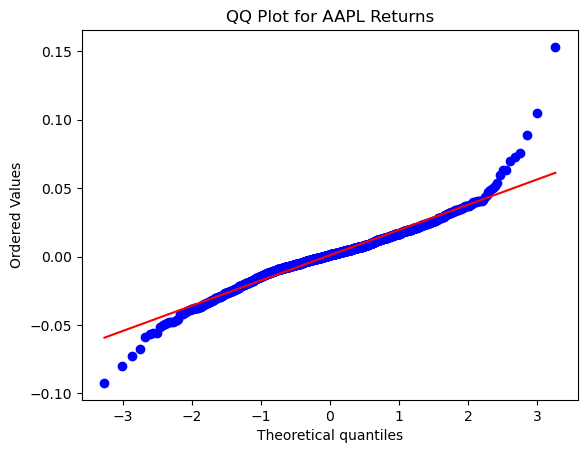

In [127]:
# qqplot for AAPL returns
import scipy.stats as stats
stats.probplot(adj_close['AAPL returns'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot for AAPL Returns')
plt.show()

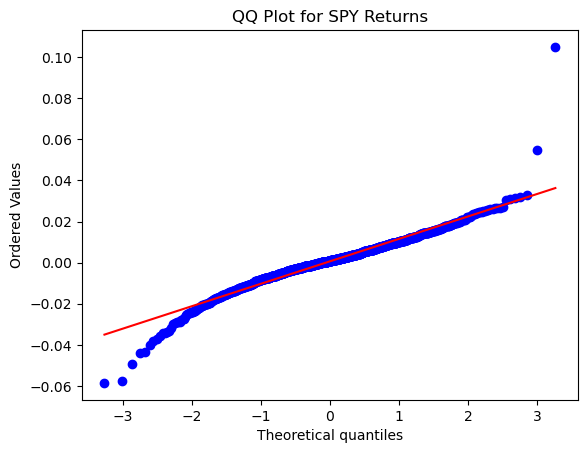

In [128]:
# qqplot for SPY returns
stats.probplot(adj_close['SPY returns'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot for SPY Returns')
plt.show()

### As we can see in the qqplots for aapl and spy returns, the points deviate from the diagonal line, indicating that the returns are not normally distributed.

In [137]:
from scipy.stats import norm, t
ret = adj_close['AAPL_log_returns'].dropna()
mu, sigma = norm.fit(ret)
print(f"Mean: {mu}, Standard Deviation: {sigma}")


Mean: 0.0007508721594746171, Standard Deviation: 0.018866088778878024


In [138]:
df_t, loc_t, scale_t = t.fit(ret)
print(f"t-distribution parameters: df={df_t}, loc={loc_t}, scale={scale_t}")

t-distribution parameters: df=4.039909767558187, loc=0.0011073773437231893, scale=0.013664544904089759


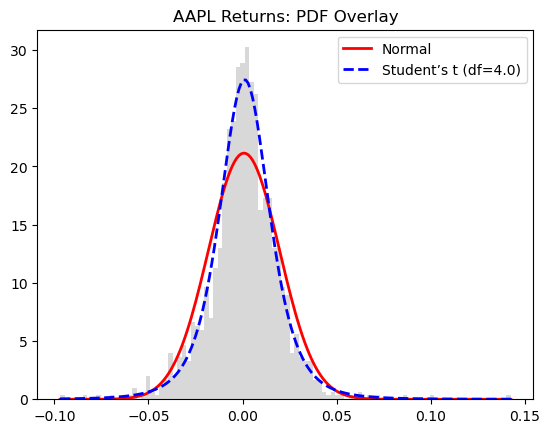

In [139]:
x = np.linspace(ret.min(), ret.max(), 200)
plt.hist(ret, bins=100, density=True, alpha=0.3, color='gray')
plt.plot(x, norm.pdf(x, mu, sigma),   'r-', lw=2, label='Normal')
plt.plot(x, t.pdf(x, df_t, loc_t, scale_t),
         'b--', lw=2, label=f"Student’s t (df={df_t:.1f})")
plt.legend(); plt.title("AAPL Returns: PDF Overlay")
plt.show()

### The t-distribution is often used in finance because it accounts for fat tails, which are common in financial returns. Next we can try the Mixed Gaussian Model to see if this better fits the return distributions.


In [144]:
# lets use the Jarque-Bera test to check for normality and the Kolmogorov-Smirnov test to compare the empirical distribution of AAPL returns with a normal distribution
from scipy.stats import jarque_bera, kstest
jb_stat, jb_p_value = jarque_bera(adj_close['AAPL returns'].dropna())
ks_stat, ks_p_value = kstest(adj_close['AAPL returns'].dropna(), 'norm', args=(mu, sigma))
print(f"Jarque-Bera Test: Statistic={jb_stat}, p-value={jb_p_value}")
print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat}, p-value={ks_p_value}")
# Lets compare this with the t-distribution and see if the t-distribution fits better
ks_t_stat, ks_t_p_value = kstest(adj_close['AAPL returns'].dropna(), 't', args=(df_t, loc_t, scale_t))
print(f"Kolmogorov-Smirnov Test for t-distribution: Statistic={ks_t_stat}, p-value={ks_t_p_value}")

# print statement to conclude which distribution fits better.
if ks_p_value < 0.05 and ks_t_p_value < 0.05:
    print("Both distributions are rejected at the 5% significance level.")
elif ks_p_value < 0.05:
    print("The normal distribution is rejected at the 5% significance level, while the t-distribution fits better.")
elif ks_t_p_value < 0.05:
    print("The t-distribution is rejected at the 5% significance level, while the normal distribution fits better.")
else:
    print("Both distributions fit well at the 5% significance level.")


Jarque-Bera Test: Statistic=1651.8219859502587, p-value=0.0
Kolmogorov-Smirnov Test: Statistic=0.06838845199443919, p-value=1.4943403662320862e-05
Kolmogorov-Smirnov Test for t-distribution: Statistic=0.017731680349301837, p-value=0.8177579129988716
The normal distribution is rejected at the 5% significance level, while the t-distribution fits better.


### We see that the student t-distribution fits the AAPL returns better than the normal distribution, we cannot reject the null hypothesis of normality for AAPL returns and fail to reject the null hypothesis of t-distribution for AAPL returns.

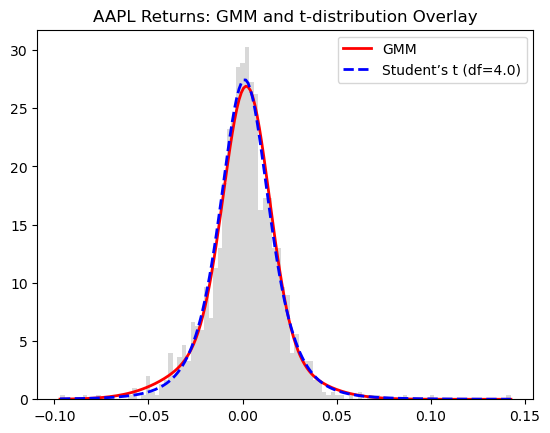

In [146]:
# mixed gaussian model with t-distribution overlay on ret
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(ret.values.reshape(-1, 1))
x = np.linspace(ret.min(), ret.max(), 200).reshape(-1, 1)
pdf = np.exp(gmm.score_samples(x))
plt.hist(ret, bins=100, density=True, alpha=0.3, color='gray')
plt.plot(x, pdf, 'r-', lw=2, label='GMM')
plt.plot(x, t.pdf(x, df_t, loc_t, scale_t), 'b--', lw=2, label=f"Student’s t (df={df_t:.1f})")
plt.legend()
plt.title("AAPL Returns: GMM and t-distribution Overlay")
plt.show()

### Visually, we can see that the results are similar, although the GMM model may fit the tails of the distribution more appropriately.

In [ ]:
# Compute the Pearson correlation coefficient between AAPL_ret and SPY_ret.
pearson_corr = adj_close['AAPL returns'].corr(adj_close['SPY returns'])
print(f"Pearson Correlation Coefficient between AAPL and SPY: {pearson_corr}")


Pearson Correlation Coefficient between AAPL and SPY: 0.7548480360800072


### The PCC suggests a strong positive correlation between the returns.

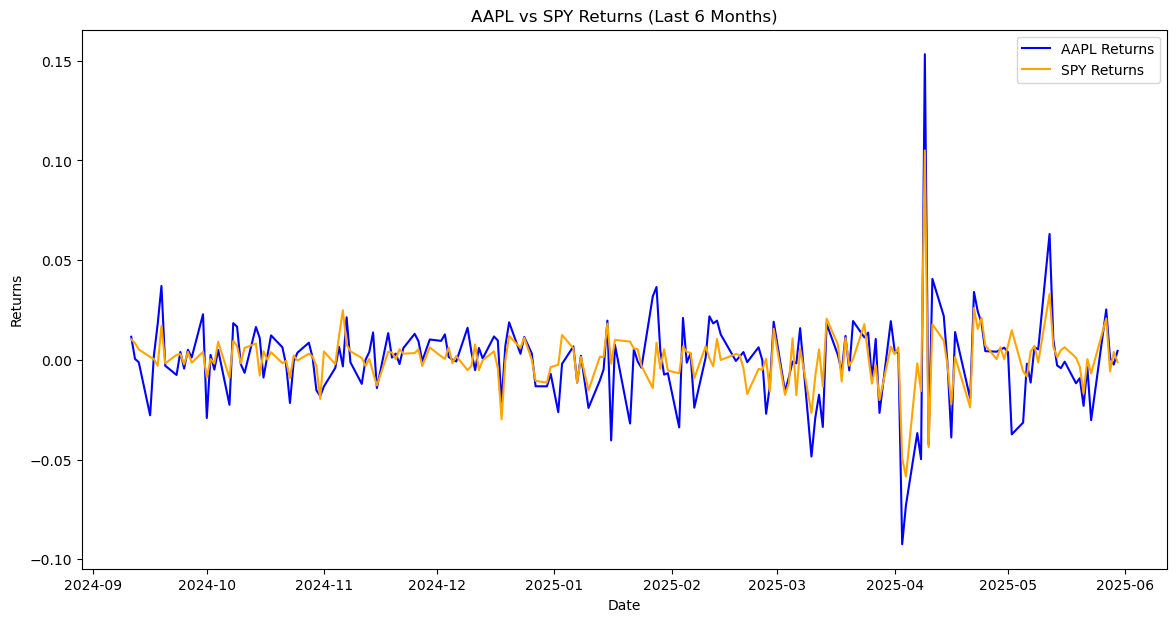

In [ ]:
# Plot the two series over a 6 month window to visually inspect comovements. 
plt.figure(figsize=(14, 7))
plt.plot(adj_close['AAPL returns'][-180:], label='AAPL Returns', color='blue')
plt.plot(adj_close['SPY returns'][-180:], label='SPY Returns', color='orange')
plt.title('AAPL vs SPY Returns (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [ ]:
# Now we will calculate the alpha and beta of AAPL with respect to SPY using linear regression
alpha_df = adj_close.copy().dropna()
X = alpha_df['SPY returns'].values.reshape(-1, 1)
Y = alpha_df['AAPL returns'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, Y)
alpha, beta = model.intercept_[0], model.coef_[0][0]
print(f"Alpha: {alpha}, Beta: {beta}")

Alpha: 0.00011235771831073337, Beta: 1.2675107106969272


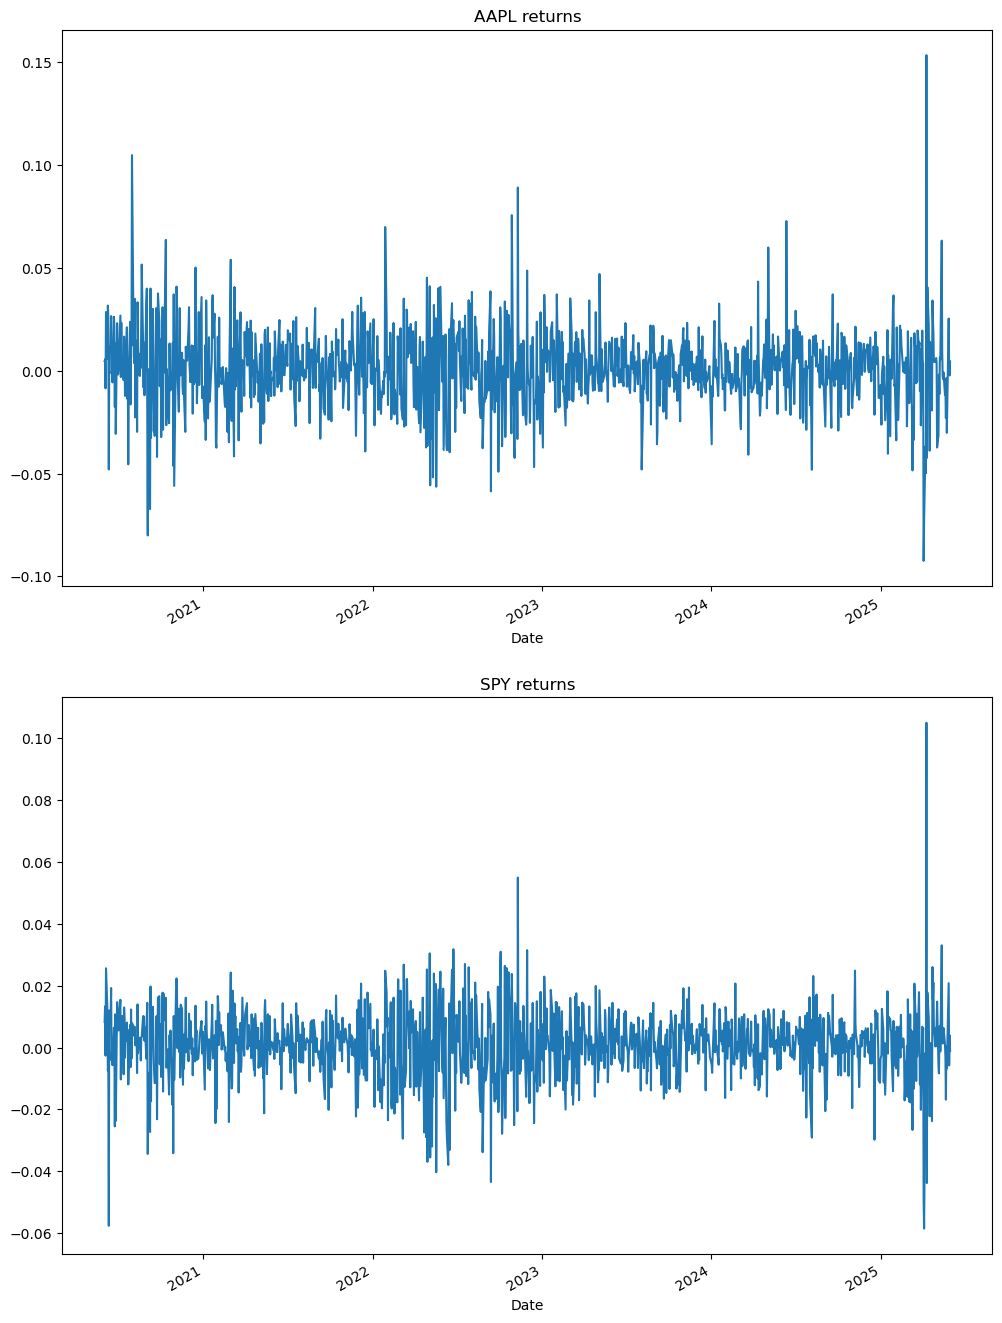

In [ ]:
# volatility clustering for AAPL and SPY returns

close = adj_close[['AAPL returns', 'SPY returns']].copy()
for i, symbol in enumerate(close.columns):
  plt.subplot(len(close.columns), 1, i + 1)
  plt.title(symbol)
  close[symbol].plot(figsize=(12,18));
plt.show()